In [1]:
import pandas as pd
import numpy as np

columns = ['age','workclass','temp','education','edunum','maritalstatus',
           'occupation','relationship','race','sex','capitalgain','capitalloss',
           'hoursperweek','country','income']
#income_train = pd.read_csv("adult-training.csv",header=None,names=columns)
#income_test = pd.read_csv("adult-test.csv",header=None,names=columns)
#df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
hoursperweek_train = pd.read_csv("adult_data.csv",names = columns,header=None)
hoursperweek_test = pd.read_csv("adult_test.csv",names = columns,header=None)

In [2]:
hoursperweek_train.head()

age          workclass    temp   education  edunum        maritalstatus  \
0   39          State-gov   77516   Bachelors      13        Never-married   
1   50   Self-emp-not-inc   83311   Bachelors      13   Married-civ-spouse   
2   38            Private  215646     HS-grad       9             Divorced   
3   53            Private  234721        11th       7   Married-civ-spouse   
4   28            Private  338409   Bachelors      13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek         country  income  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [3]:
hoursperweek_test.head()

age   workclass      temp      education  edunum  \
0  |1x3 Cross validator         NaN       NaN            NaN     NaN   
1                    25     Private  226802.0           11th     7.0   
2                    38     Private   89814.0        HS-grad     9.0   
3                    28   Local-gov  336951.0     Assoc-acdm    12.0   
4                    44     Private  160323.0   Some-college    10.0   

         maritalstatus          occupation relationship    race    sex  \
0                  NaN                 NaN          NaN     NaN    NaN   
1        Never-married   Machine-op-inspct    Own-child   Black   Male   
2   Married-civ-spouse     Farming-fishing      Husband   White   Male   
3   Married-civ-spouse     Protective-serv      Husband   White   Male   
4   Married-civ-spouse   Machine-op-inspct      Husband   Black   Male   

   capitalgain  capitalloss  hoursperweek         country   income  
0          NaN          NaN           NaN             NaN      NaN  
1          0.0          0.0          40.0   United-States   <=50K.  
2          0.0          0.0          50.0   United-States   <=50K.  
3          0.0          0.0          40.0   United-States    >50K.  
4       7688.0          0.0          40.0   United-States    >50K.

In [4]:
#刪除測試集第一航資料
hoursperweek_test = hoursperweek_test.iloc[1: , :]

In [5]:
hoursperweek_train.shape

(32561, 15)

In [6]:
hoursperweek_test.shape

(16281, 15)

In [7]:
#比較訓練和測試中的分類值
s = (hoursperweek_train.dtypes == 'object')
object_cols = list(s[s].index)
for column in object_cols:
     print(column + ' - ' + 'Train')
     print(sorted(hoursperweek_train[column].unique()))
     print()
     print(column + ' - ' + 'Test')
     print(sorted(hoursperweek_test[column].unique()))
     print()

workclass - Train
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

workclass - Test
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

education - Train
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']

education - Test
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']

maritalstatus - Train
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']

maritalstatus - Test
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', 

In [8]:
hoursperweek_train[hoursperweek_train['country'] == ' Holand-Netherlands']

age workclass   temp      education  edunum   maritalstatus  \
19609   32   Private  27882   Some-college      10   Never-married   

               occupation     relationship    race      sex  capitalgain  \
19609   Machine-op-inspct   Other-relative   White   Female            0   

       capitalloss  hoursperweek              country  income  
19609         2205            40   Holand-Netherlands   <=50K

In [9]:
#刪除訓練集country=Holand-Netherlands的資料，因為在測試集中沒有
# income_train=income_train.drop(income_train['country'] == ' Holand-Netherlands', axis=0)
hoursperweek_train = hoursperweek_train.drop(hoursperweek_train[hoursperweek_train['country'] == ' Holand-Netherlands'].index, axis=0)

In [10]:
hoursperweek_train[hoursperweek_train['country'] == ' Holand-Netherlands']

Empty DataFrame
Columns: [age, workclass, temp, education, edunum, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, country, income]
Index: []

In [11]:
hoursperweek_train = hoursperweek_train.replace(" ?", np.nan)#將?的值改成nan
hoursperweek_train.dropna(inplace=True)#刪除空值
hoursperweek_train.shape

(30161, 15)

In [12]:
hoursperweek_test = hoursperweek_test.replace(" ?", np.nan)#將?的值改成nan
hoursperweek_test.dropna(inplace=True)#刪除空值
hoursperweek_test.shape

(15060, 15)

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

lbe = LabelEncoder()
sds = StandardScaler()
categorical_columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','country','income']
normalize_columns = ['age', 'temp', 'edunum','capitalgain','capitalloss']

for col in categorical_columns:
    hoursperweek_train[col] = lbe.fit_transform(hoursperweek_train[col])
    hoursperweek_test[col] = lbe.fit_transform(hoursperweek_test[col])

def normalize(columns):
  hoursperweek_train[columns] = sds.fit_transform(hoursperweek_train[columns])
  hoursperweek_test[columns] = sds.fit_transform(hoursperweek_test[columns])
normalize(normalize_columns)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_hoursperweek_train = hoursperweek_train.drop('hoursperweek', axis=1)
Y_hoursperweek_train = hoursperweek_train['hoursperweek']

In [15]:
# 將訓練集分成訓練和驗證
X_train, X_val, y_train, y_val = train_test_split(X_hoursperweek_train, Y_hoursperweek_train, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_val.shape)

(24128, 14)
(6033, 14)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 構建 FNN 模型
model = Sequential()
model.add(Dense(32, input_dim=14, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam')
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True)

In [17]:
# 訓練模型
history = model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# best_epoch = early_stopping.stopped_epoch-20
# print('Best epoch:', best_epoch)
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience+1
print('original的Best epoch:', best_epoch)
print('original的Validation loss at best epoch:', early_stopping.best)

Epoch 1/10000
754/754 [==============================] - 2s 3ms/step - loss: 261.3321 - val_loss: 133.5775
Epoch 2/10000
754/754 [==============================] - 2s 2ms/step - loss: 136.5808 - val_loss: 128.9910
Epoch 3/10000
754/754 [==============================] - 2s 3ms/step - loss: 132.9591 - val_loss: 125.2849
Epoch 4/10000
754/754 [==============================] - 2s 2ms/step - loss: 130.7603 - val_loss: 123.8206
Epoch 5/10000
754/754 [==============================] - 2s 3ms/step - loss: 128.7025 - val_loss: 120.6363
Epoch 6/10000
754/754 [==============================] - 2s 3ms/step - loss: 126.9826 - val_loss: 119.2941
Epoch 7/10000
754/754 [==============================] - 2s 3ms/step - loss: 124.8860 - val_loss: 117.8357
Epoch 8/10000
754/754 [==============================] - 2s 3ms/step - loss: 122.6473 - val_loss: 114.7658
Epoch 9/10000
754/754 [==============================] - 2s 3ms/step - loss: 120.6115 - val_loss: 113.0193
Epoch 10/10000
754/754 [=============

In [41]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# 加載最佳的模型權重
model.load_weights('best_weights.h5')
X_hoursperweek_test = hoursperweek_test.drop('hoursperweek', axis=1)
Y_hoursperweek_test = hoursperweek_test['hoursperweek']
Y_hoursperweek_test_pred = model.predict(X_hoursperweek_test)
test_mae = mean_absolute_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
test_mape = mean_absolute_percentage_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
test_mse = mean_squared_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
test_rmse = np.sqrt(test_mse)
print("original的MAE指標評估:", test_mae)
print("original的MAPE指標評估:", test_mape)
print("original的RMSE指標評估:", test_rmse)

original的MAE指標評估: 7.252396136862665
original的MAPE指標評估: 0.2705332996736543
original的RMSE指標評估: 10.57295361483201


In [44]:
Y_hoursperweek_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, Y_hoursperweek_train_pred)
train_mape = mean_absolute_percentage_error(y_train, Y_hoursperweek_train_pred)
train_mse = mean_squared_error(y_train, Y_hoursperweek_train_pred)
train_rmse = np.sqrt(train_mse)
print("original的MAE指標評估:", train_mae)
print("original的MAPE指標評估:", train_mape)
print("original的RMSE指標評估:", train_rmse)

original的MAE指標評估: 7.147013833059557
original的MAPE指標評估: 0.2606630985576153
original的RMSE指標評估: 10.401360492685562


In [45]:
Y_hoursperweek_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, Y_hoursperweek_val_pred)
val_mape = mean_absolute_percentage_error(y_val, Y_hoursperweek_val_pred)
val_mse = mean_squared_error(y_val, Y_hoursperweek_val_pred)
val_rmse = np.sqrt(val_mse)
print("original的MAE指標評估:", val_mae)
print("original的MAPE指標評估:", val_mape)
print("original的RMSE指標評估:", val_rmse)

original的MAE指標評估: 7.090312629439198
original的MAPE指標評估: 0.2511170811350336
original的RMSE指標評估: 10.228776446415155


## 測試不同類神經網路的架構與參數設定

In [38]:
# 構建 FNN 模型
model2 = Sequential()
model2.add(Dense(128, input_dim=14, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1))

# 編譯模型
model2.compile(loss='mean_squared_error', optimizer='adam')
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights2.h5', save_best_only=True, save_weights_only=True)

In [39]:
# 訓練模型
history2 = model2.fit(X_train, y_train, epochs=10000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# best_epoch = early_stopping.stopped_epoch-20
# print('Best epoch:', best_epoch)
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience+1
print('exp1的Best epoch:', best_epoch)
print('exp1的Validation loss at best epoch:', early_stopping.best)

Epoch 1/10000
754/754 [==============================] - 3s 4ms/step - loss: 185.0716 - val_loss: 126.3317
Epoch 2/10000
754/754 [==============================] - 3s 3ms/step - loss: 131.4664 - val_loss: 122.3745
Epoch 3/10000
754/754 [==============================] - 2s 3ms/step - loss: 128.3411 - val_loss: 119.9465
Epoch 4/10000
754/754 [==============================] - 2s 3ms/step - loss: 126.1280 - val_loss: 121.5245
Epoch 5/10000
754/754 [==============================] - 2s 3ms/step - loss: 123.5133 - val_loss: 114.3146
Epoch 6/10000
754/754 [==============================] - 3s 3ms/step - loss: 121.0202 - val_loss: 112.0831
Epoch 7/10000
754/754 [==============================] - 2s 3ms/step - loss: 118.6832 - val_loss: 111.5143
Epoch 8/10000
754/754 [==============================] - 2s 3ms/step - loss: 117.5445 - val_loss: 110.6228
Epoch 9/10000
754/754 [==============================] - 2s 3ms/step - loss: 116.6511 - val_loss: 108.6670
Epoch 10/10000
754/754 [=============

In [40]:
# 加載最佳的模型權重
model2.load_weights('best_weights2.h5')
X_hoursperweek_test = hoursperweek_test.drop('hoursperweek', axis=1)
Y_hoursperweek_test = hoursperweek_test['hoursperweek']
Y_hoursperweek_test_pred = model2.predict(X_hoursperweek_test)
mae = mean_absolute_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mape = mean_absolute_percentage_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mse = mean_squared_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
rmse = np.sqrt(mse)
print("exp1的MAE指標評估:", mae)
print("exp1的MAPE指標評估:", mape)
print("exp1的RMSE指標評估:", rmse)

exp1的MAE指標評估: 7.142980952471851
exp1的MAPE指標評估: 0.2697596903673904
exp1的RMSE指標評估: 10.587794589051903


In [22]:
# 構建 FNN 模型
model3 = Sequential()
model3.add(Dense(64, input_dim=14, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1))

# 編譯模型
model3.compile(loss='mean_squared_error', optimizer='adam')
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights3.h5', save_best_only=True, save_weights_only=True)

In [23]:
# 訓練模型
history3 = model3.fit(X_train, y_train, epochs=10000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# model.fit(X_train, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# best_epoch = early_stopping.stopped_epoch-20
# print('Best epoch:', best_epoch)
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience+1
print('exp2的Best epoch:', best_epoch)
print('exp2的Validation loss at best epoch:', early_stopping.best)

Epoch 1/10000
754/754 [==============================] - 2s 3ms/step - loss: 182.7646 - val_loss: 126.4146
Epoch 2/10000
754/754 [==============================] - 2s 3ms/step - loss: 131.8489 - val_loss: 123.2763
Epoch 3/10000
754/754 [==============================] - 3s 4ms/step - loss: 129.4976 - val_loss: 119.8249
Epoch 4/10000
754/754 [==============================] - 2s 3ms/step - loss: 126.0302 - val_loss: 116.4604
Epoch 5/10000
754/754 [==============================] - 2s 3ms/step - loss: 122.4534 - val_loss: 112.6009
Epoch 6/10000
754/754 [==============================] - 2s 3ms/step - loss: 119.3601 - val_loss: 112.4792
Epoch 7/10000
754/754 [==============================] - 3s 3ms/step - loss: 118.2865 - val_loss: 111.6418
Epoch 8/10000
754/754 [==============================] - 2s 3ms/step - loss: 117.5378 - val_loss: 109.9007
Epoch 9/10000
754/754 [==============================] - 2s 3ms/step - loss: 116.0871 - val_loss: 111.7295
Epoch 10/10000
754/754 [=============

In [24]:
# 加載最佳的模型權重
model3.load_weights('best_weights3.h5')
X_hoursperweek_test = hoursperweek_test.drop('hoursperweek', axis=1)
Y_hoursperweek_test = hoursperweek_test['hoursperweek']
Y_hoursperweek_test_pred = model3.predict(X_hoursperweek_test)
mae = mean_absolute_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mape = mean_absolute_percentage_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mse = mean_squared_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
rmse = np.sqrt(mse)
print("exp2的MAE指標評估:", mae)
print("exp2的MAPE指標評估:", mape)
print("exp2的RMSE指標評估:", rmse)

exp2的MAE指標評估: 7.198877438131082
exp2的MAPE指標評估: 0.2656687919924363
exp2的RMSE指標評估: 10.559944951253177


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 構建 FNN 模型
model4 = Sequential()
model4.add(Dense(32, input_dim=14, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1))

# 編譯模型
model4.compile(loss='mean_squared_error', optimizer='adam')
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights4.h5', save_best_only=True, save_weights_only=True)

In [26]:
# 訓練模型
history4 = model4.fit(X_train, y_train, epochs=10000, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience+1
print('exp3的Best epoch:', best_epoch)
print('exp3的Validation loss at best epoch:', early_stopping.best)

Epoch 1/10000
377/377 [==============================] - 1s 3ms/step - loss: 283.4427 - val_loss: 139.5284
Epoch 2/10000
377/377 [==============================] - 1s 3ms/step - loss: 139.1116 - val_loss: 129.1314
Epoch 3/10000
377/377 [==============================] - 1s 3ms/step - loss: 133.9463 - val_loss: 126.0928
Epoch 4/10000
377/377 [==============================] - 1s 3ms/step - loss: 132.0103 - val_loss: 125.0655
Epoch 5/10000
377/377 [==============================] - 1s 3ms/step - loss: 130.6973 - val_loss: 123.3898
Epoch 6/10000
377/377 [==============================] - 1s 3ms/step - loss: 129.5260 - val_loss: 122.6364
Epoch 7/10000
377/377 [==============================] - 1s 3ms/step - loss: 127.9887 - val_loss: 123.0828
Epoch 8/10000
377/377 [==============================] - 1s 3ms/step - loss: 126.3755 - val_loss: 118.7839
Epoch 9/10000
377/377 [==============================] - 1s 3ms/step - loss: 123.6959 - val_loss: 116.6572
Epoch 10/10000
377/377 [=============

In [27]:
# 加載最佳的模型權重
model4.load_weights('best_weights4.h5')
X_hoursperweek_test = hoursperweek_test.drop('hoursperweek', axis=1)
Y_hoursperweek_test = hoursperweek_test['hoursperweek']
Y_hoursperweek_test_pred = model4.predict(X_hoursperweek_test)
mae = mean_absolute_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mape = mean_absolute_percentage_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mse = mean_squared_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
rmse = np.sqrt(mse)
print("exp3的MAE指標評估:", mae)
print("exp3的MAPE指標評估:", mape)
print("exp3的RMSE指標評估:", rmse)

exp3的MAE指標評估: 7.247584098838715
exp3的MAPE指標評估: 0.2677877378688039
exp3的RMSE指標評估: 10.608600122446616


In [28]:
# 構建 FNN 模型
model5 = Sequential()
model5.add(Dense(64, input_dim=14, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1))

# 編譯模型
model5.compile(loss='mean_squared_error', optimizer='adam')
# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
# 設置 ModelCheckpoint 紀錄最佳權重
model_checkpoint = ModelCheckpoint('best_weights5.h5', save_best_only=True, save_weights_only=True)

In [29]:
# 訓練模型
history5 = model5.fit(X_train, y_train, epochs=10000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])
# 找到最佳的 epoch
best_epoch = early_stopping.stopped_epoch - early_stopping.patience+1
print('exp4的Best epoch:', best_epoch)
print('exp4的Validation loss at best epoch:', early_stopping.best)

Epoch 1/10000
754/754 [==============================] - 3s 5ms/step - loss: 173.0553 - val_loss: 125.0603
Epoch 2/10000
754/754 [==============================] - 3s 4ms/step - loss: 133.1761 - val_loss: 126.4297
Epoch 3/10000
754/754 [==============================] - 3s 4ms/step - loss: 130.1506 - val_loss: 122.6575
Epoch 4/10000
754/754 [==============================] - 3s 4ms/step - loss: 128.4502 - val_loss: 149.2888
Epoch 5/10000
754/754 [==============================] - 3s 4ms/step - loss: 126.2540 - val_loss: 117.5096
Epoch 6/10000
754/754 [==============================] - 3s 4ms/step - loss: 123.5643 - val_loss: 117.4907
Epoch 7/10000
754/754 [==============================] - 3s 4ms/step - loss: 122.3795 - val_loss: 121.4540
Epoch 8/10000
754/754 [==============================] - 3s 4ms/step - loss: 119.9995 - val_loss: 113.1772
Epoch 9/10000
754/754 [==============================] - 3s 4ms/step - loss: 118.6837 - val_loss: 110.2168
Epoch 10/10000
754/754 [=============

In [30]:
# 加載最佳的模型權重
model5.load_weights('best_weights5.h5')
X_hoursperweek_test = hoursperweek_test.drop('hoursperweek', axis=1)
Y_hoursperweek_test = hoursperweek_test['hoursperweek']
Y_hoursperweek_test_pred = model5.predict(X_hoursperweek_test)
mae = mean_absolute_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mape = mean_absolute_percentage_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
mse = mean_squared_error(Y_hoursperweek_test, Y_hoursperweek_test_pred)
rmse = np.sqrt(mse)
print("exp4的MAE指標評估:", mae)
print("exp4的MAPE指標評估:", mape)
print("exp4的RMSE指標評估:", rmse)

exp4的MAE指標評估: 7.16421386508511
exp4的MAPE指標評估: 0.2723992295513593
exp4的RMSE指標評估: 10.520066163355898


In [31]:
print(history.history['loss'])
print(history2.history['loss'])
print(history3.history['loss'])
print(history4.history['loss'])
print(history5.history['loss'])

[261.33209228515625, 136.58084106445312, 132.9591064453125, 130.76031494140625, 128.70254516601562, 126.98258972167969, 124.885986328125, 122.64730834960938, 120.6115493774414, 119.30387115478516, 118.63630676269531, 117.59037017822266, 116.83512878417969, 116.46246337890625, 116.52510833740234, 115.90357971191406, 115.58727264404297, 115.54698944091797, 114.98359680175781, 114.62543487548828, 114.58828735351562, 114.81804656982422, 114.21612548828125, 113.66270446777344, 113.47407531738281, 113.69607543945312, 113.17268371582031, 113.35627746582031, 112.86397552490234, 112.69847106933594, 112.4968490600586, 112.90123748779297, 112.47327423095703, 112.71018981933594, 112.19415283203125, 112.0047836303711, 111.89215087890625, 111.79950714111328, 111.62476348876953, 111.26162719726562, 111.08796691894531, 111.09432220458984, 110.99951171875, 110.82398986816406, 110.8747329711914, 110.72019958496094, 110.1819076538086, 110.42222595214844, 110.38737487792969, 110.71723937988281, 110.334579

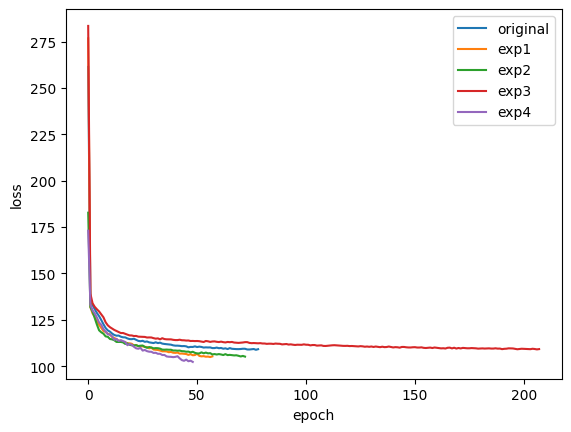

In [32]:
import matplotlib.pyplot as plt
df = pd.DataFrame([history.history['loss'],history2.history['loss'],history3.history['loss'],history4.history['loss'],history5.history['loss']]).T
df.columns=["original","exp1","exp2","exp3","exp4"]
df.plot()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

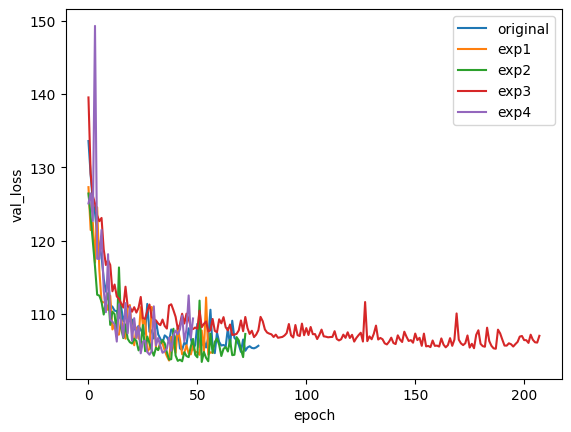

In [33]:
df2 = pd.DataFrame([history.history['val_loss'],history2.history['val_loss'],history3.history['val_loss'],history4.history['val_loss'],history5.history['val_loss']]).T
df2.columns=["original","exp1","exp2","exp3","exp4"]
df2.plot()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()